In [113]:
import cv2
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
data_path = (
    Path.cwd().parent.parent.parent  # Repository root
    / "data"
    / "traffic"
    / "car-object-detection"
)

train_img_folder = data_path / "training_images"
test_img_folder = data_path / "testing_images"
bbox_csv = data_path / "train_solution_bounding_boxes (1).csv"

# Dataset overview

We're working with Kaggle's [Car Object Detection](https://www.kaggle.com/datasets/sshikamaru/car-object-detection) dataset. It contains images of cars in an urban environment and the images are annotated with bounding boxes represented as a CSV file.

The images seem to be taken as frames from a video, which makes this dataset interesting for applications like dash cams.


In [115]:
print("Number of train images", len(os.listdir(train_img_folder)))
print("Number of test images", len(os.listdir(test_img_folder)))

Number of train images 1001
Number of test images 175


In [145]:
bboxes_df = pd.read_csv(bbox_csv)
bboxes_df.head()

image        xmin        ymin        xmax        ymax
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422

Bounding boxes are in a "two points" format, where coordinates of two diagonally opposed points are passed. We are also dealing with a single class "car".


In [144]:
bboxes_df[bboxes_df.duplicated(subset="image")].head()

image        xmin        ymin        xmax        ymax
38  vid_4_12140.jpg  592.356006  169.428893  641.759768  210.509974
40  vid_4_12160.jpg  537.571635  173.830438  581.105644  205.130309
41  vid_4_12160.jpg  640.781476  168.939833  676.000000  222.736487
43  vid_4_12180.jpg  482.787265  174.808559  518.984081  204.641248
44  vid_4_12180.jpg  555.670043  171.385135  614.367583  221.758365

Some images have multiple bounding boxes associated. That occurs when there are multiple cars in an image.

# Visualizing images

Let's take a look at the training data


In [140]:
np.random.seed(4)

num_images = 24
imgs = list(train_img_folder.rglob("*.jpg"))
sample_imgs = np.random.choice(imgs, size=num_images, replace=False)

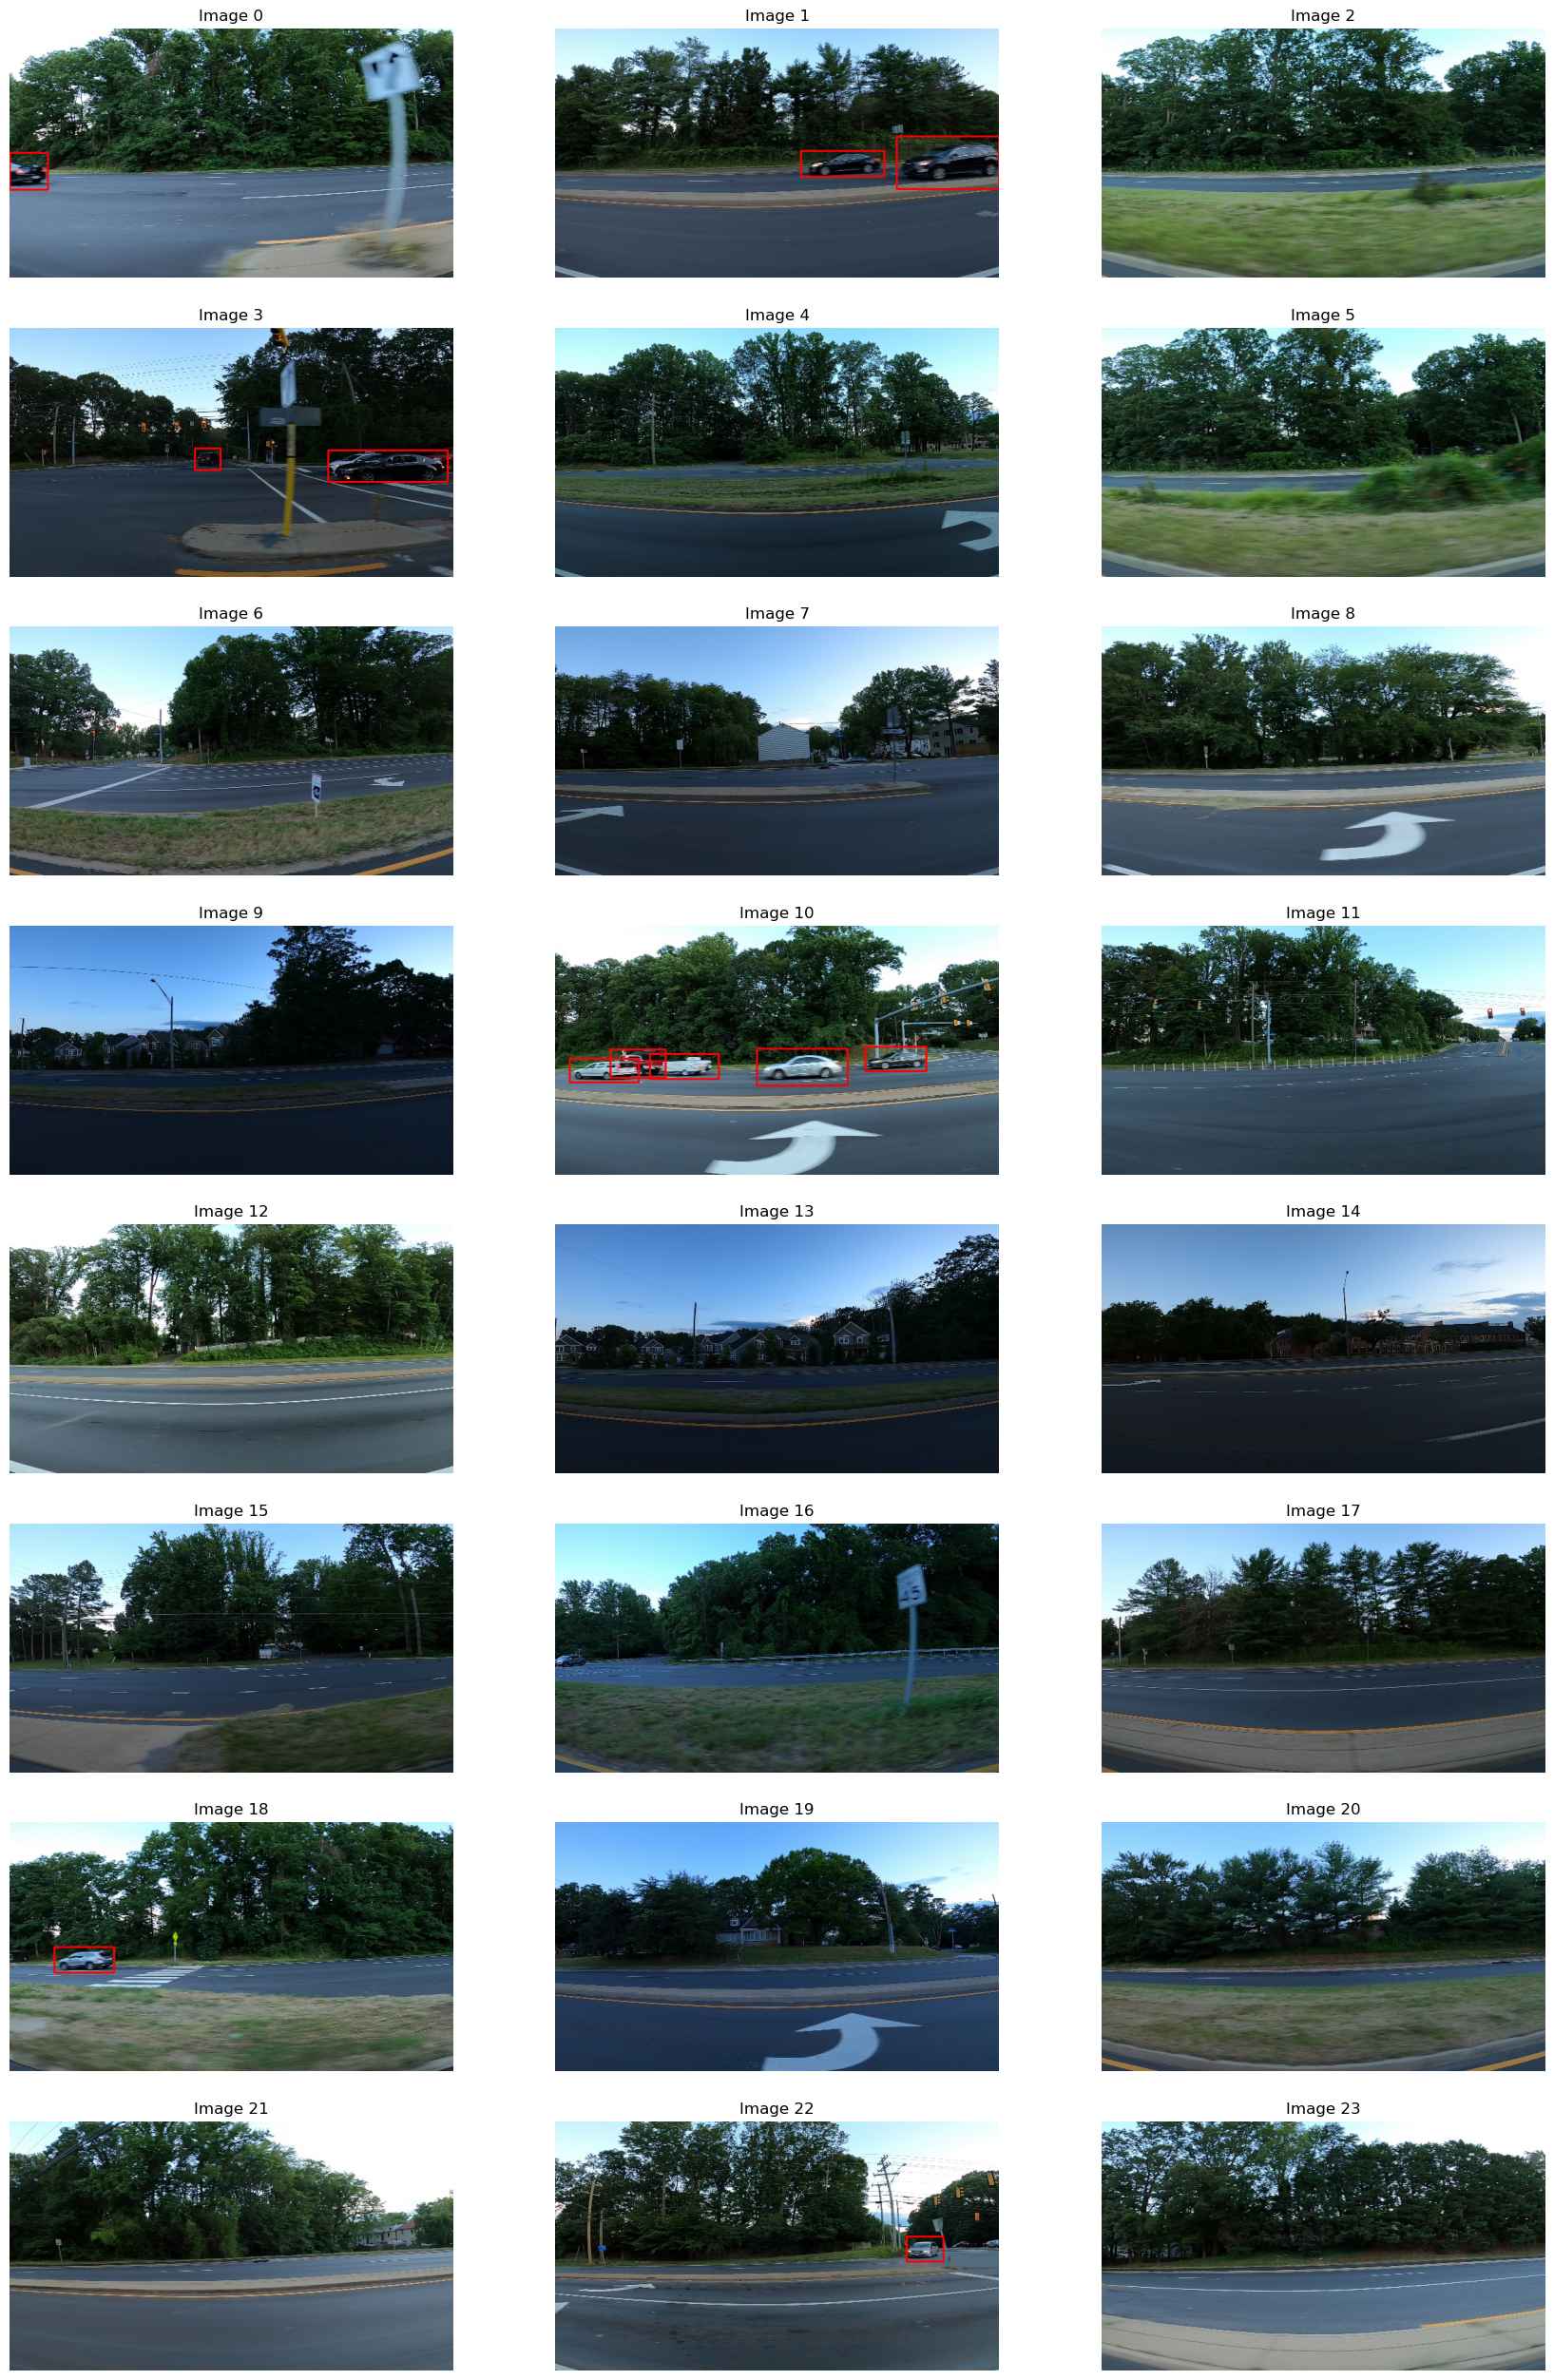

In [146]:
num_cols = 3
num_rows = -(-num_images // num_cols)  # Divide num_images by num_cols and round up
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7 * num_cols, 4 * num_rows))

for img_num, img_file in enumerate(sample_imgs):
    ax = axes.flat[img_num]
    ax.axis("off")

    img = cv2.imread(str(img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    bboxes = bboxes_df[bboxes_df["image"] == img_file.name]
    for idx, filename, *coordinates in bboxes.itertuples():
        xmin, ymin, xmax, ymax = map(int, coordinates)
        cv2.rectangle(img, (int(xmin), ymin), (xmax, ymax), (255, 0, 0), 2)

    ax.imshow(img)
    ax.set_title(f"Image {img_num}")

Takeaways:

-   Some images are really blurred (0, 2, 5)
-   Apparentely there is a significant number of images with no cars
-   Labels are not perfect (3, 16, 22)
-   Predominantly this "side of the road" view
-   Brightness can vary considerably (e.g. 9, 10)
